<a href="https://colab.research.google.com/github/JohnnySunkel/BlueSky/blob/master/Transfer_Learning_CNN_MobileNet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math

TRAIN_DATA_DIR = 'drive/My Drive/train'
VALIDATION_DATA_DIR = 'drive/My Drive/validation'
TRAIN_SAMPLES = 500
VALIDATION_SAMPLES = 500
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True,
                                                    seed = 12345,
                                                    class_mode = 'categorical')
validation_generator = val_datagen.flow_from_directory(VALIDATION_DATA_DIR,
                                                       target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                       batch_size = BATCH_SIZE,
                                                       shuffle = False,
                                                       class_mode = 'categorical')

def model_maker():
  base_model = MobileNet(include_top = False,
                         input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))
  for layer in base_model.layers[:]:
    layer.trainable = False
  input = Input(shape = (IMG_WIDTH, IMG_HEIGHT, 3))
  custom_model = base_model(input)
  custom_model = GlobalAveragePooling2D()(custom_model)
  custom_model = Dense(64, activation = 'relu')(custom_model)
  custom_model = Dropout(0.5)(custom_model)
  predictions = Dense(NUM_CLASSES, activation = 'softmax')(custom_model)
  return Model(inputs = input, outputs = predictions)

model = model_maker()
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(0.001),
              metrics = ['acc'])
model.fit_generator(train_generator,
                    steps_per_epoch = math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE),
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = math.ceil(float(VALIDATION_SAMPLES) / BATCH_SIZE))

model.save('model.h5')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Epoch 1/10
8/8 [==============================] - 253s 32s/step - loss: 0.8623 - acc: 0.5684 - val_loss: 0.4166 - val_acc: 0.8711
Epoch 2/10
8/8 [==============================] - 89s 11s/step - loss: 0.4342 - acc: 0.7852 - val_loss: 0.1078 - val_acc: 0.9922
Epoch 3/10
8/8 [==============================] - 92s 12s/step - loss: 0.3057 - acc: 0.8848 - val_loss: 0.1050 - val_acc: 0.9785
Epoch 4/10
8/8 [==============================] - 123s 15s/step - loss: 0.2488 - acc: 0.8793 - val_loss: 0.0324 - val_acc: 0.9941
Epoch 5/10
8/8 [==============================] - 90s 11s/step - loss: 0.2040 - acc: 0.9258 - val_loss: 0.0162 - val_acc: 0.9941
Epoch 6/10
8/8 [==============================] - 87s 11s/step - loss: 0.1780 - acc: 0.9375 - val_loss: 0.0338 - val_acc: 0

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model = load_model('model.h5')

img = image.load_img('drive/My Drive/dog.jpg', target_size = (224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis = 0)
preprocessed_img = preprocess_input(expanded_img_array)
prediction = model.predict(preprocessed_img)
print(prediction)
print(validation_generator.class_indices)

[[0.14910574 0.8508942 ]]
{'cats': 0, 'dogs': 1}


Found 1000 images belonging to 2 classes.
1000
['cats/cat.1000.jpg', 'cats/cat.1001.jpg', 'cats/cat.1002.jpg', 'cats/cat.1003.jpg', 'cats/cat.1004.jpg', 'cats/cat.1005.jpg', 'cats/cat.1006.jpg', 'cats/cat.1007.jpg', 'cats/cat.1008.jpg', 'cats/cat.1009.jpg']
1000
[0 0 0 0 0 0 0 0 0 0]
{'cats': 0, 'dogs': 1}
{0: 'cats', 1: 'dogs'}
[[9.9922967e-01 7.7038724e-04]
 [9.6246797e-01 3.7532076e-02]
 [9.9877769e-01 1.2222717e-03]
 [9.9845934e-01 1.5407124e-03]
 [9.5650911e-01 4.3490916e-02]
 [9.9817359e-01 1.8263428e-03]
 [9.9656469e-01 3.4353293e-03]
 [9.9589479e-01 4.1052676e-03]
 [9.8875672e-01 1.1243262e-02]
 [9.9702877e-01 2.9712811e-03]]
0.974


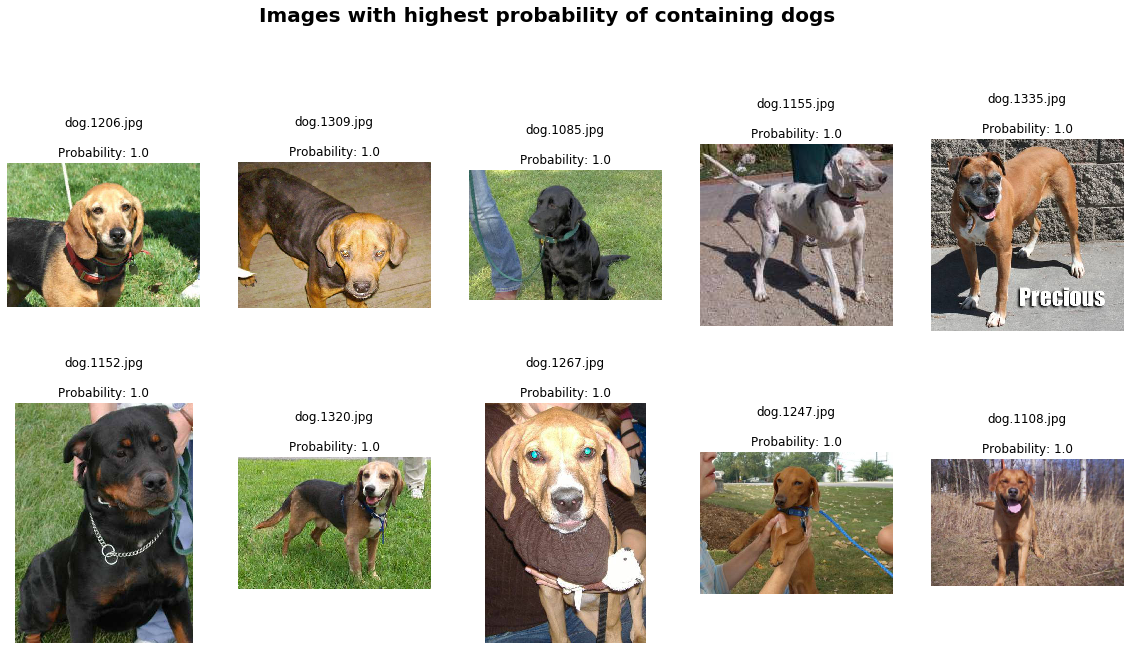

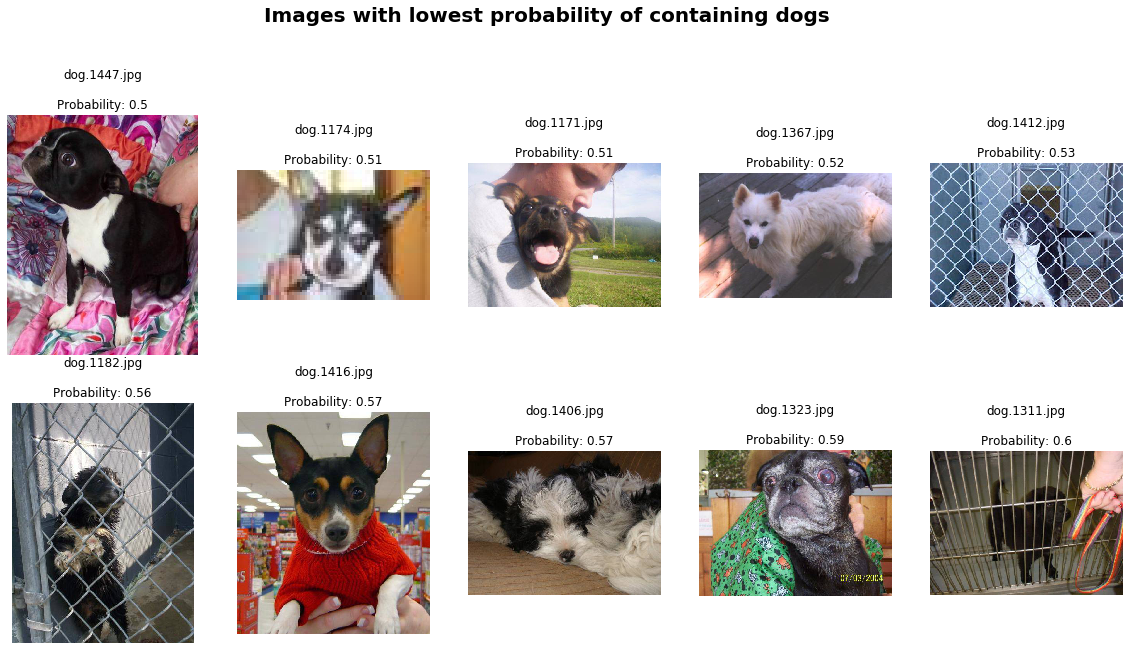

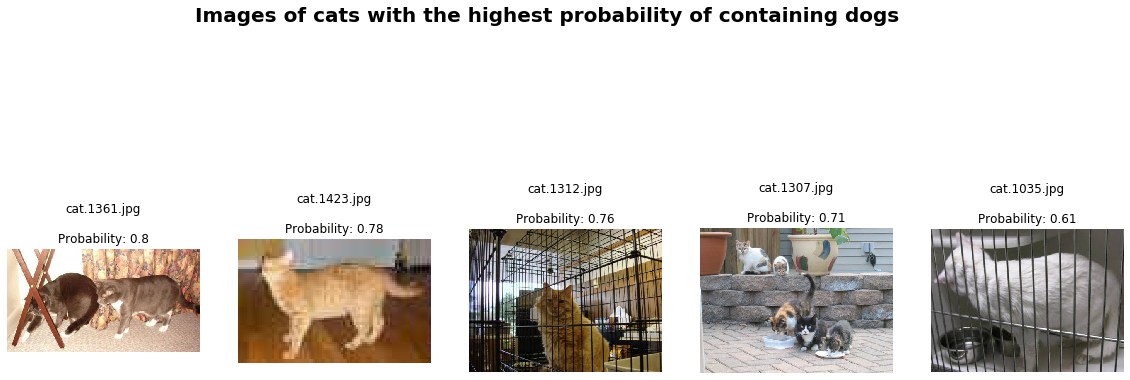

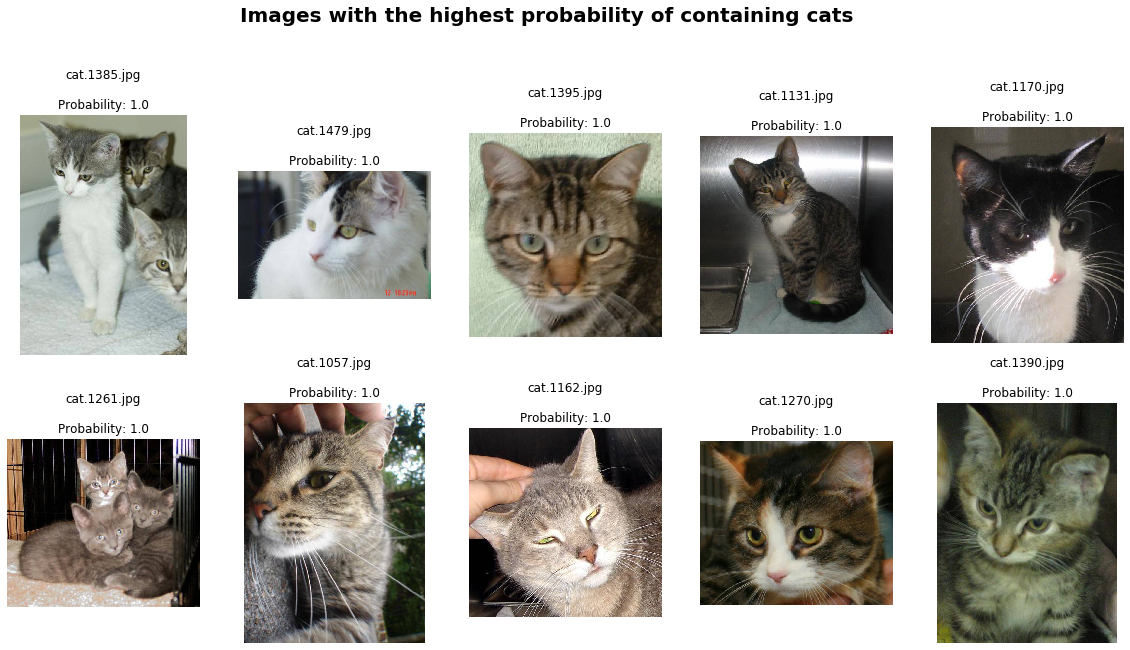

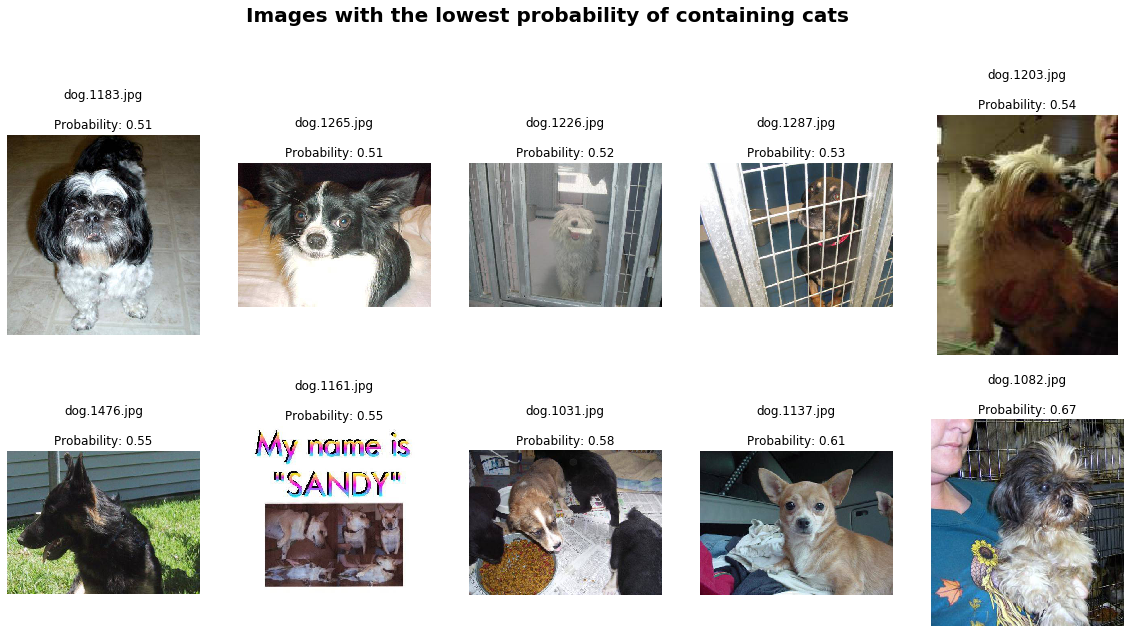

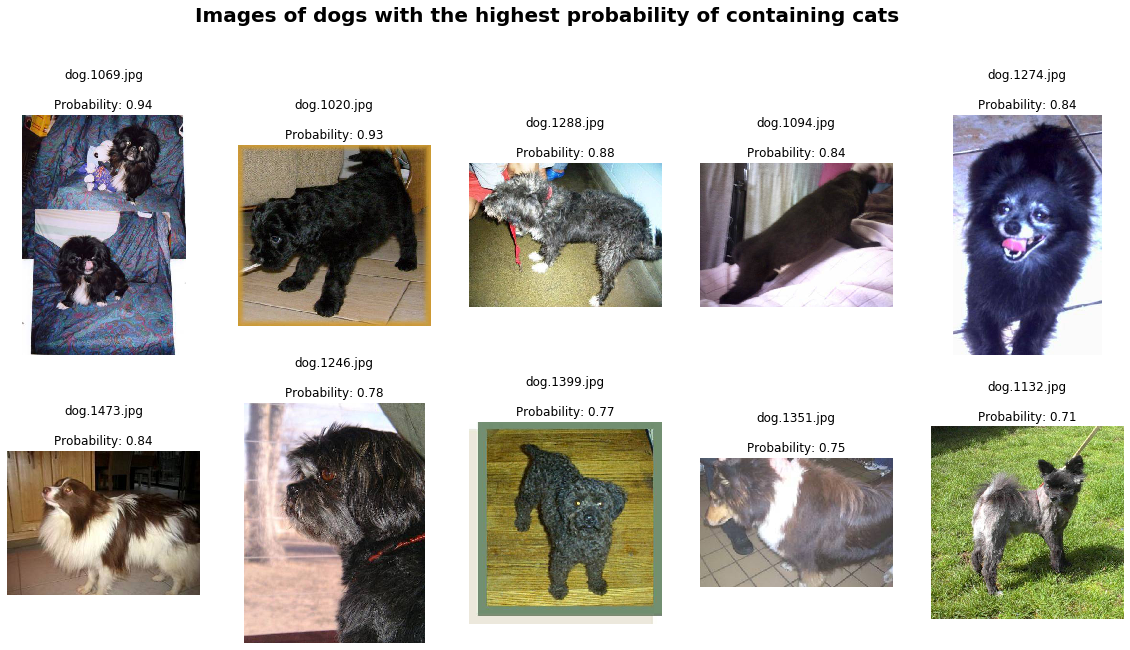

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import load_model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMG_WIDTH, IMG_HEIGHT = 224, 224
VALIDATION_DATA_DIR = 'drive/My Drive/validation/'
VALIDATION_BATCH_SIZE = 64

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DATA_DIR,
                                                              target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                              batch_size = VALIDATION_BATCH_SIZE,
                                                              shuffle = False,
                                                              class_mode = 'categorical')
filenames = validation_generator.filenames
print(len(filenames))
print(filenames[:10])

ground_truth = validation_generator.classes
print(len(ground_truth))
print(ground_truth[:10])

label_to_index = validation_generator.class_indices
print(label_to_index)

index_to_label = dict((v, k) for k, v in label_to_index.items())
print(index_to_label)

model = load_model('model.h5')

predictions = model.predict_generator(validation_generator)
print(predictions[:10])

prediction_index = []
for prediction in predictions:
  prediction_index.append(np.argmax(prediction))

def accuracy(predictions, ground_truth):
  total = 0
  for i, j in zip(predictions, ground_truth):
    if i == j:
      total += 1
  return total * 1.0 / len(predictions)

print(accuracy(prediction_index, ground_truth))

prediction_table = {}
for index, val in enumerate(predictions):
  index_of_highest_probability = np.argmax(val)
  value_of_highest_probability = val[index_of_highest_probability]
  prediction_table[index] = [value_of_highest_probability, index_of_highest_probability, ground_truth[index]
  ]
assert len(predictions) == len(ground_truth) == len(prediction_table)

def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
  sorted_prediction_table = [(k, prediction_table[k])
                              for k in sorted(prediction_table,
                                              key=prediction_table.get,
                                              reverse=get_highest_probability)
                              ]
  result = []
  for index, key in enumerate(sorted_prediction_table):
    image_index, [probability, predicted_index, gt] = key
    if predicted_index == label:
      if only_false_predictions == True:
        if predicted_index != gt:
          result.append([image_index, [probability, predicted_index, gt]])
      else:
        result.append([image_index, [probability, predicted_index, gt]])
  return result[:number_of_items]

def plot_images(filenames, distances, message):
  images = []
  for filename in filenames:
    images.append(mpimg.imread(filename))
  plt.figure(figsize = (20, 15))
  columns = 5
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.set_title('\n\n' + filenames[i].split('/')[-1] + '\n' + '\nProbability: ' + str(float('{0:.2f}'.format(distances[i]))))
    plt.subtitle(message, fontsize = 20, fontweight = 'bold')
    plt.axis('off')
    plt.imshow(image)

def plot_images(filenames, distances, message):
  images = []
  for filename in filenames:
    images.append(mpimg.imread(filename))
  plt.figure(figsize=(20, 15))
  columns = 5
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
    plt.suptitle(message, fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.imshow(image)

# Most confident predictions of 'dog'
most_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, 
                                                                 True, 
                                                                 1, 
                                                                 10,
                                                                 False)
message = 'Images with highest probability of containing dogs'
display(most_confident_dog_images, message)

# Least confident predictions of 'dog'
least_confident_dog_images = get_images_with_sorted_probabilities(prediction_table, 
                                                                  False, 
                                                                  1, 
                                                                  10,
                                                                  False)
message = 'Images with lowest probability of containing dogs'
display(least_confident_dog_images, message)

# Incorrect predictions of 'dog'
incorrect_dog_images = get_images_with_sorted_probabilities(prediction_table,
                                                            True,
                                                            1,
                                                            10,
                                                            True)
message = 'Images of cats with the highest probability of containing dogs'
display(incorrect_dog_images, message)

# Most confident predictions of 'cat'
most_confident_cat_images = get_images_with_sorted_probabilities(prediction_table,
                                                                 True,
                                                                 0,
                                                                 10,
                                                                 False)
message = 'Images with the highest probability of containing cats'
display(most_confident_cat_images, message)

# Least confident predictions of 'cat'
least_confident_cat_images = get_images_with_sorted_probabilities(prediction_table,
                                                                  False,
                                                                  0,
                                                                  10,
                                                                  False)
message = 'Images with the lowest probability of containing cats'
display(least_confident_cat_images, message)

# Incorrect predictions of 'cat'
incorrect_cat_images = get_images_with_sorted_probabilities(prediction_table,
                                                            True,
                                                            0,
                                                            10,
                                                            True)
message = 'Images of dogs with the highest probability of containing cats'
display(incorrect_cat_images, message)                                        